# Machine Learning Engineer Nanodegree - Capstone Project

## Santander Customer Transaction Prediction

This project's objective is to predict whether a customer will make a specific transaction in the future or not, regardless of the amount of money transacted. To achieve this objective we'll be using anonymized consisting of 200 features along with a target column for training, which states if the user made the transaction or not.

### Loading data

In [6]:
# Importing main libraries for the project
# Other eventual libraries will be imported on demand
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # to use display() for DataFrames


# Loading training and testing data
training_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")

# Loading sample submission data
submission = pd.read_csv('sample_submission.csv')

# Peeking at first 10 observations
display(training_data.head(n=10))

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


### Data Exploration and Visualization

Total number of customers: 200000
Customers that will not make future transactions: 179902
Customers that will make future transactions: 20098
Percentage of customers tha will make future transactions: 10.049%


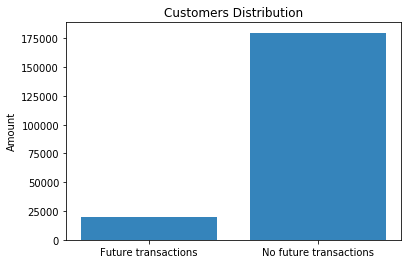

In [9]:
# Number of customers
n_cust = training_data.shape[0]

# Number of customers that will not make future transactions
n_no_fut_trans = training_data[training_data["target"] == 0].shape[0]

# Number of customers that will make future transactions
n_fut_trans = training_data[training_data["target"] == 1].shape[0]

positions = [0.5, 1.5]
customers = [n_fut_trans, n_no_fut_trans]
labels = ['Future transactions', 'No future transactions' ]

plt.bar(positions, customers, align='center', alpha=0.9)
plt.xticks(positions, labels)
plt.ylabel('Amount')
plt.title('Customers Distribution')

print("Total number of customers: {}".format(n_cust))
print("Customers that will not make future transactions: {}".format(n_no_fut_trans))
print("Customers that will make future transactions: {}".format(n_fut_trans))
print("Percentage of customers tha will make future transactions: {}%".format(n_fut_trans/n_cust*100))

In [3]:
# Outlier detection (Turkey's method)
outliers_t  = []
repeated = []

# Features
X = data.drop(['target'], axis = 1)

# For each feature 
for feature in X.keys():
    
    # Calculate first quartile
    Q1 = np.percentile(X[feature], 25)
    
    # Calculate
    Q3 = np.percentile(X[feature], 75)
    
    # Calculate interquatile range * 1.5
    step = (Q3-Q1)*1.5
    
    for i in list((X[~((X[feature] >= Q1 - step) & (X[feature] <= Q3 + step))]).index.values):
        if i not in outliers_t:
            outliers_t.append(i)
        elif i not in repeated:
            repeated.append(i)


print("Number of points considered outliers in more than one feature: {}".format(len(repeated)))
print("Number of points considered outliers in some feature: {}".format(len(outliers_t)))

Number of points considered outliers in more than one feature: 1556
Number of points considered outliers in some feature: 24896


In [5]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

# Dropping rows with outlier values in more than one feature
filtered_data = data.drop(repeated)

# Checking data distribution after outliers removal
# Number of customers that will not make future transactions
n_no_fut_trans = filtered_data[filtered_data["target"] == 0].shape[0]
# Number of customers that will make future transactions
n_fut_trans = filtered_data[filtered_data["target"] == 1].shape[0]

print("Customers that will not make future transactions: {}".format(n_no_fut_trans))
print("Customers that will make future transactions: {}".format(n_fut_trans))
print("Percentage of customers tha will make future transactions: {}%".format(n_fut_trans/n_cust*100))

# Generating smote (oversampling) 
smt = SMOTE(random_state=42)

# Generating StratifiedKFold Cross-validator
n_folds = 10
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

Customers that will not make future transactions: 178569
Customers that will make future transactions: 19875
Percentage of customers tha will make future transactions: 9.9375%


In [6]:
from sklearn.decomposition import PCA
filtered_features = filtered_data.drop('target', axis=1)
filtered_targets= filtered_data[['target']].values

# Applying pca to the filtered data
pca = PCA(n_components=0.9, svd_solver='full').fit(filtered_features.reset_index(drop=True))

# Checking number of components
print("Number of components after pca: {}".format(pca.n_components_))

# Transforming data based on components
transf_features = pca.transform(filtered_features)

Number of components after pca: 90


In [7]:
# Outlier detection (Local Outlier Factor)
# Not viable due to O(n²) complexity, takes too long as result of dataset size
# Kept for future reference only

# from sklearn.neighbors import LocalOutlierFactor

# lof = LocalOutlierFactor()

# outliers_l = lof.fit_predict(X)

# print("Number of points considered outliers: {}".format(len(outliers_l[outliers_l == -1])))

In [8]:
from sklearn.metrics import roc_auc_score, fbeta_score
from time import time

# Function used for the classifiers pipeline
def train_predict(classifier, X_train, y_train, X_test, y_test, sample_size=-1):
   
    results = {}
    
    if(sample_size == -1):
        sample_size = X_train.shape[0]
        
    start = time() # Get training start time
    classifier = classifier.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get training end time
    
    # Storing training time
    results['train_time'] = end-start
    
    start = time() # Get predictions start time
    predictions_test = classifier.predict(X_test)
    predictions_train = classifier.predict(X_train)
    end = time() # Get predictions end time
    
    results['pred_time'] = end-start
    
    # Compute area under the receive operating characterist curve using roc_auc_acore
    results['roc_train'] = roc_auc_score(y_train, predictions_train)
    results['roc_test'] = roc_auc_score(y_test, predictions_test)
    
    # Compute F-score using fbeta_score
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=2)
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=2)
    
    return results


In [9]:
# Code provided by udacity from machine learning engineer nanodegree project 
def evaluate(results, roc_auc, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 4, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'roc_train', 'f_train', 'pred_time', 'roc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("ROC AUC Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("ROC AUC Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("ROC AUC on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("ROC AUC Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = roc_auc, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = roc_auc, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Set additional plots invisibles
    ax[0, 3].set_visible(False)
    ax[1, 3].axis('off')

    # Create legend
    for i, learner in enumerate(results.keys()):
        plt.bar(0, 0, color=colors[i], label=learner)
    plt.legend()
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

In [10]:
from collections import defaultdict

def mean_result(results):
    
    final_results = defaultdict(dict)
    
    for clf, data in results.items():
        classifier_data = data
        
        for size, values in classifier_data.items():
            results = values
            
            train_time = 0.0
            pred_time = 0.0
            roc_train = 0.0
            roc_test = 0.0
            f_train = 0.0
            f_test = 0.0
            
            for fold_result in results:
                train_time += fold_result['train_time']
                pred_time += fold_result['pred_time']
                roc_train += fold_result['roc_train']
                roc_test += fold_result['roc_test']
                f_train += fold_result['f_train']
                f_test += fold_result['f_test']
            
            train_time /= len(fold_result)
            pred_time /= len(fold_result)
            roc_train /= len(fold_result)
            roc_test /= len(fold_result)
            f_train /= len(fold_result)
            f_test /= len(fold_result)
            
            result = {'train_time': train_time, 'pred_time': pred_time, \
                      'roc_train': roc_train, 'roc_test': roc_test, \
                      'f_train': f_train, 'f_test': f_test}
            
            final_results[clf][size] = result
    
    return final_results

In [ ]:
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from collections import defaultdict

clf_A = CatBoostClassifier(silent=True, eval_metric='AUC', early_stopping_rounds=500, \
                           task_type='GPU', od_type='Iter', random_state=42)
clf_B = XGBClassifier()
clf_C = GaussianNB()

results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = defaultdict(lambda: [])
    j = 0
    for train_index, test_index in skf.split(transf_features, filtered_targets):

        # Separating training and testing data
        X_train, X_test = transf_features[train_index], transf_features[test_index]
        y_train, y_test = filtered_targets[train_index], filtered_targets[test_index]

        # Oversampling minor class
        X_train, y_train = smt.fit_resample(X_train, y_train)

        size_1 = int(0.01 * X_train.shape[0])
        size_10 =int(0.1 * X_train.shape[0])
        size_100 = X_train.shape[0]

        for i, samples in enumerate([size_1, size_10, size_100]):
            results[clf_name][i].append(train_predict(clf, X_train, y_train, X_test, y_test, samples))
        j += 1


In [ ]:
# Calculating results mean
final_results = mean_result(results)

# Run metrics visualization for the three supervised learning models chosen
evaluate(final_results, 0.8, 0.8)

# Checking numeric values for each method used (complete training set)
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    print("{} \n Time - Training: {} \t Testing: {} \n ROC AUC - Train: {} \t Test: {} \n F-Score: Train: {} \t Test: {}" \
          .format(clf_name, \
          final_results[clf_name][2]['train_time'],final_results[clf_name][2]['pred_time'], \
          final_results[clf_name][2]['roc_train'],final_results[clf_name][2]['roc_test'], \
          final_results[clf_name][2]['f_train'], final_results[clf_name][2]['f_test']))

In [12]:
import lightgbm as lgb

submission_data = pd.read_csv('test.csv')

pred_submission = 0

submission_data.drop('ID_code', axis=1, inplace=True)

results_train = np.empty((0,0))
results_test = np.empty((0,0))

for index, (train_index, test_index) in enumerate(skf.split(filtered_features, filtered_targets)):
    
        print("Fold {}".format(index+1))
        # Separating training and testing data
        X_train, X_test = filtered_features.values[train_index], filtered_features.values[test_index]
        y_train, y_test = filtered_targets[train_index], filtered_targets[test_index]

        # Oversampling minor class
#         X_train, y_train = smt.fit_resample(X_train, y_train)

        # Creating dataset for classifier 
        train_data = lgb.Dataset(X_train, label=y_train[:,0])
        test_data = lgb.Dataset(X_test, label=y_test[:,0])
        
        param = {'random_state':42, 'metric': 'auc', 'bagging_freq': 5, 'bagging_fraction': 0.35,
                 'min_data_in_leaf': 256, 'learning_rate': 0.005, 'objective': 'binary', 'max_leaves': 80,
                 'num_threads': 4, 'is_unbalance': True}
        model = lgb.train(param, train_data, 100000, valid_sets = [train_data, test_data], early_stopping_rounds=2048,verbose_eval=2048)
        
        predictions_train = model.predict(X_train, num_iteration=model.best_iteration)
        predictions_test = model.predict(X_test, num_iteration=model.best_iteration)
        
        train_auc = roc_auc_score(y_train, predictions_train)
        test_auc = roc_auc_score(y_test, predictions_test)
        
        results_train = np.append(results_train, train_auc)
        results_test = np.append(results_test, test_auc)
        
        pred_submission += model.predict(submission_data, num_iteration=model.best_iteration)/n_folds
        
print("Overall train ROC AUC: {}".format(np.mean(results_train)))
print("Overall test ROC AUC: {}".format(np.mean(results_test)))

Fold 1
Training until validation scores don't improve for 2048 rounds.
[2048]	training's auc: 0.969931	valid_1's auc: 0.890834
[4096]	training's auc: 0.989464	valid_1's auc: 0.895319
[6144]	training's auc: 0.997329	valid_1's auc: 0.895559
Early stopping, best iteration is:
[4725]	training's auc: 0.992844	valid_1's auc: 0.895886
Fold 2
Training until validation scores don't improve for 2048 rounds.
[2048]	training's auc: 0.969556	valid_1's auc: 0.893836
[4096]	training's auc: 0.989441	valid_1's auc: 0.898408
[6144]	training's auc: 0.997279	valid_1's auc: 0.898366
[8192]	training's auc: 0.999478	valid_1's auc: 0.898304
Early stopping, best iteration is:
[6244]	training's auc: 0.997475	valid_1's auc: 0.898539
Fold 3
Training until validation scores don't improve for 2048 rounds.
[2048]	training's auc: 0.970255	valid_1's auc: 0.885461
[4096]	training's auc: 0.989541	valid_1's auc: 0.890219
[6144]	training's auc: 0.997321	valid_1's auc: 0.890491
Early stopping, best iteration is:
[4782]	tra

In [13]:
submission['target'] = pred_submission
submission.to_csv('submission.csv', index=False)